In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [01:36<00:00, 23.6MB/s]
100% 1.98G/1.98G [01:36<00:00, 22.0MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Rescaling

In [7]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_path='/content/train'
valid_path='/content/validation'

In [9]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=30,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

# valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# generators
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=False)

data_val = tf.keras.utils.image_dataset_from_directory(valid_path,
                                                       image_size=(180,180),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False
                                                       )

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [12]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
import matplotlib.pyplot as plt

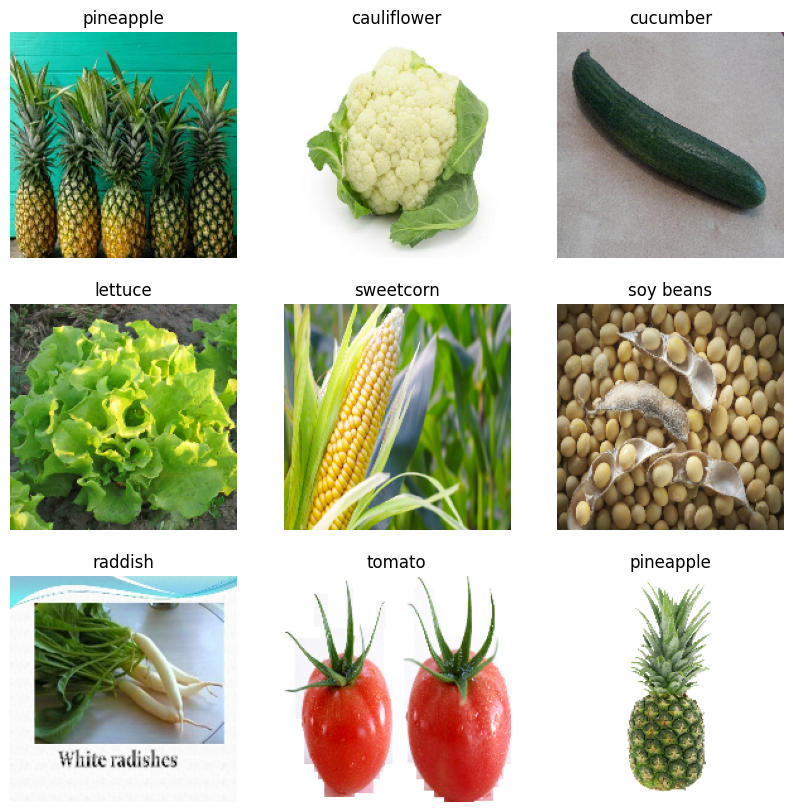

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [15]:
# # Normalize
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Define the number of classes
num_classes = len(data_cat)

# Define the model
model = Sequential([
    Rescaling(1./255, input_shape=(180, 180, 3)),
    Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu'),

    MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'),
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),

    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),

    MaxPooling2D(pool_size=(2, 2),strides=2,  padding='valid'),
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),

    Dense(num_classes, activation='softmax')
])


In [19]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(data_train, epochs=10, validation_data=data_val)


Epoch 1/10
98/98 [==============================] - 77s 675ms/step - loss: 3.5179 - accuracy: 0.0498 - val_loss: 3.2534 - val_accuracy: 0.0940
Epoch 2/10
98/98 [==============================] - 67s 637ms/step - loss: 3.0258 - accuracy: 0.1461 - val_loss: 2.3961 - val_accuracy: 0.3447
Epoch 3/10
98/98 [==============================] - 66s 625ms/step - loss: 2.4296 - accuracy: 0.3111 - val_loss: 1.6960 - val_accuracy: 0.5271
Epoch 4/10
98/98 [==============================] - 66s 622ms/step - loss: 1.9131 - accuracy: 0.4401 - val_loss: 1.0492 - val_accuracy: 0.7493
Epoch 5/10
98/98 [==============================] - 66s 631ms/step - loss: 1.3934 - accuracy: 0.6000 - val_loss: 0.7231 - val_accuracy: 0.8234
Epoch 6/10
98/98 [==============================] - 65s 620ms/step - loss: 0.9344 - accuracy: 0.7258 - val_loss: 0.4511 - val_accuracy: 0.8746
Epoch 7/10
98/98 [==============================] - 66s 630ms/step - loss: 0.5851 - accuracy: 0.8337 - val_loss: 0.3710 - val_accuracy: 0.9202

In [21]:
model.fit(data_train, epochs=15, initial_epoch=10, validation_data=data_val)

Epoch 11/15
98/98 [==============================] - 67s 643ms/step - loss: 0.1682 - accuracy: 0.9599 - val_loss: 0.2625 - val_accuracy: 0.9601
Epoch 12/15
98/98 [==============================] - 65s 617ms/step - loss: 0.1168 - accuracy: 0.9743 - val_loss: 0.2422 - val_accuracy: 0.9459
Epoch 13/15
98/98 [==============================] - 66s 631ms/step - loss: 0.1082 - accuracy: 0.9759 - val_loss: 0.3062 - val_accuracy: 0.9516
Epoch 14/15
98/98 [==============================] - 66s 628ms/step - loss: 0.1214 - accuracy: 0.9682 - val_loss: 0.3371 - val_accuracy: 0.9316
Epoch 15/15
98/98 [==============================] - 69s 653ms/step - loss: 0.0998 - accuracy: 0.9782 - val_loss: 0.2696 - val_accuracy: 0.9487


In [22]:
model.fit(data_train, epochs=20, initial_epoch=15, validation_data=data_val)

Epoch 16/20
98/98 [==============================] - 67s 635ms/step - loss: 0.0668 - accuracy: 0.9836 - val_loss: 0.2974 - val_accuracy: 0.9516
Epoch 17/20
98/98 [==============================] - 68s 646ms/step - loss: 0.0551 - accuracy: 0.9875 - val_loss: 0.3510 - val_accuracy: 0.9573
Epoch 18/20
98/98 [==============================] - 65s 625ms/step - loss: 0.0593 - accuracy: 0.9827 - val_loss: 0.3089 - val_accuracy: 0.9601
Epoch 19/20
98/98 [==============================] - 66s 630ms/step - loss: 0.1048 - accuracy: 0.9727 - val_loss: 0.3749 - val_accuracy: 0.9573
Epoch 20/20
98/98 [==============================] - 65s 625ms/step - loss: 0.0622 - accuracy: 0.9833 - val_loss: 0.3082 - val_accuracy: 0.9601


In [41]:
image = '/content/Chilli.jpg'
image = tf.keras.utils.load_img(image, target_size=(180,180))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 18ms/step


In [43]:
score = tf.nn.softmax(predict)

In [44]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*1000))

Veg/Fruit in image is paprika with accuracy of 72.07


In [45]:
model.save('Image_classify.keras')